In [159]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

### QUESTION 1
#### Using the Iris Flowers Dataset, build and Neural Network with the following specifications to perform multi-class classification.
- Split the Data into Training: Validation: Testing = 80:10:10
- Number of Hidden Layers = 2, containing 8 Neurons and 4 Neurons
- Use RELU activation function in the hidden layers, choose the optimizer as ADAM and set learning rate to be equal to 0.1.

In [160]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

In [161]:
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)

In [162]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [163]:
model_iris = Sequential([
    Dense(8, activation='relu', input_shape=(X.shape[1],)),
    Dense(4, activation='relu'),
    Dense(3, activation='softmax')
])

In [164]:
print("Iris Dataset Model Summary:")
model_iris.summary()

Iris Dataset Model Summary:


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [165]:
optimizer = Adam(learning_rate=0.1)
model_iris.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [166]:
epochs = 50
batch_size = 16
history_iris = model_iris.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=0)

In [167]:
test_loss, test_acc = model_iris.evaluate(X_test, y_test, verbose=0)
print(f"Iris Test Accuracy: {test_acc:.4f}")

Iris Test Accuracy: 1.0000


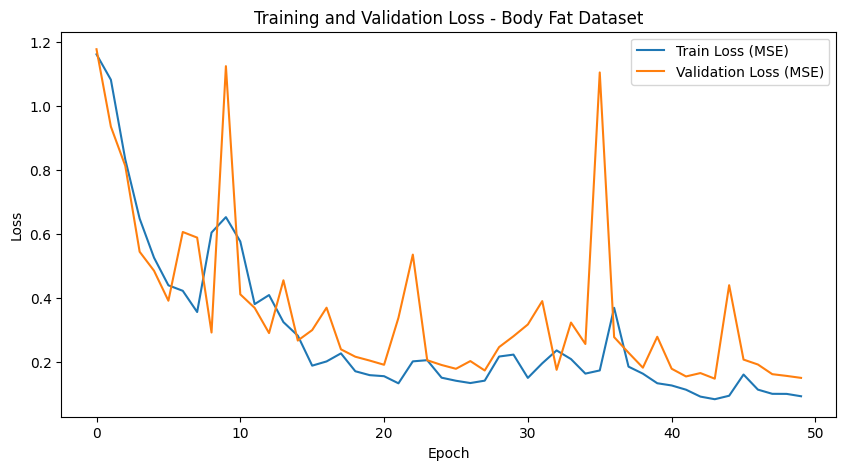

In [168]:
plt.figure(figsize=(10,5))
plt.plot(history_iris.history['loss'], label='Train Loss (MSE)')
plt.plot(history_iris.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - Body Fat Dataset')
plt.legend()
plt.show()

### QUESTION 2
#### Use the following hyperparameters/design choices for your neural network: 
- Split the data in the ratio Training: Validation: Testing = 80:10:10. 
- Perform Normalization using Standard Scalar. 
- Number of Hidden layers = 3 and number of units for each hidden layers are 128,64,32, respectively. 
- Use RELU activation function in the hidden layers, choose the optimizer as ADAM and set learning rate to be equal to 0.1. 


In [169]:
df = pd.read_csv('bodyfat.csv')

In [170]:
df.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [172]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [173]:
X_bf = df.drop(columns=['BodyFat']).values
y_bf = df['BodyFat'].values

In [174]:
X_train_bf, X_temp_bf, y_train_bf, y_temp_bf = train_test_split(X_bf, y_bf, test_size=0.2, random_state=42)
X_val_bf, X_test_bf, y_val_bf, y_test_bf = train_test_split(X_temp_bf, y_temp_bf, test_size=0.5, random_state=42)

In [175]:
scaler = StandardScaler()
X_train_bf_scaled = scaler.fit_transform(X_train_bf)
X_val_bf_scaled = scaler.transform(X_val_bf)
X_test_bf_scaled = scaler.transform(X_test_bf)

In [176]:
model_bf = Sequential([
    Dense(128, activation='relu', input_shape=(X_bf.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [177]:
print("\nBody Fat Dataset Model Summary:")
model_bf.summary()


Body Fat Dataset Model Summary:


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [178]:
optimizer_bf = Adam(learning_rate=0.1)
model_bf.compile(optimizer=optimizer_bf, loss='mse', metrics=['mae'])

In [179]:
epochs = 100
batch_size = 16
history_bf = model_bf.fit(X_train_bf_scaled, y_train_bf,
                          validation_data=(X_val_bf_scaled, y_val_bf),
                          epochs=epochs, batch_size=batch_size, verbose=0)

In [180]:
test_loss_bf, test_mae_bf = model_bf.evaluate(X_test_bf_scaled, y_test_bf, verbose=0)
print(f"Body Fat Test MAE: {test_mae_bf:.4f}")

Body Fat Test MAE: 0.4291


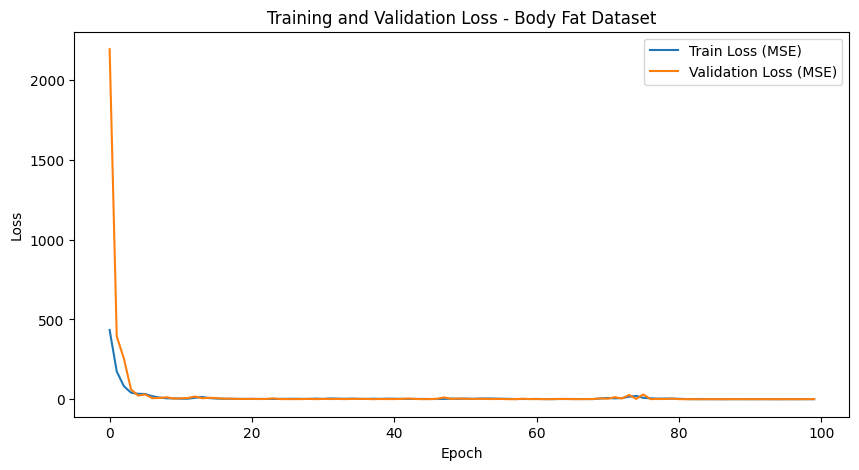

In [181]:
plt.figure(figsize=(10,5))
plt.plot(history_bf.history['loss'], label='Train Loss (MSE)')
plt.plot(history_bf.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - Body Fat Dataset')
plt.legend()
plt.show()